In [2]:
import numpy as np
import matplotlib.pyplot as plt

#### Gradient Descent and Variants - 1

##### Rosenbrock Function

In [3]:
def rosenbrock(x, y):
    return x**2 + 100*(y-x**2)**2

##### Gradient descent with constant step size

In [4]:
def gradient(x,y):
    return np.array([2*x - 400*x*(y-x**2), 200*(y-x**2)])

[2.54669459e-17 6.61774349e-34]


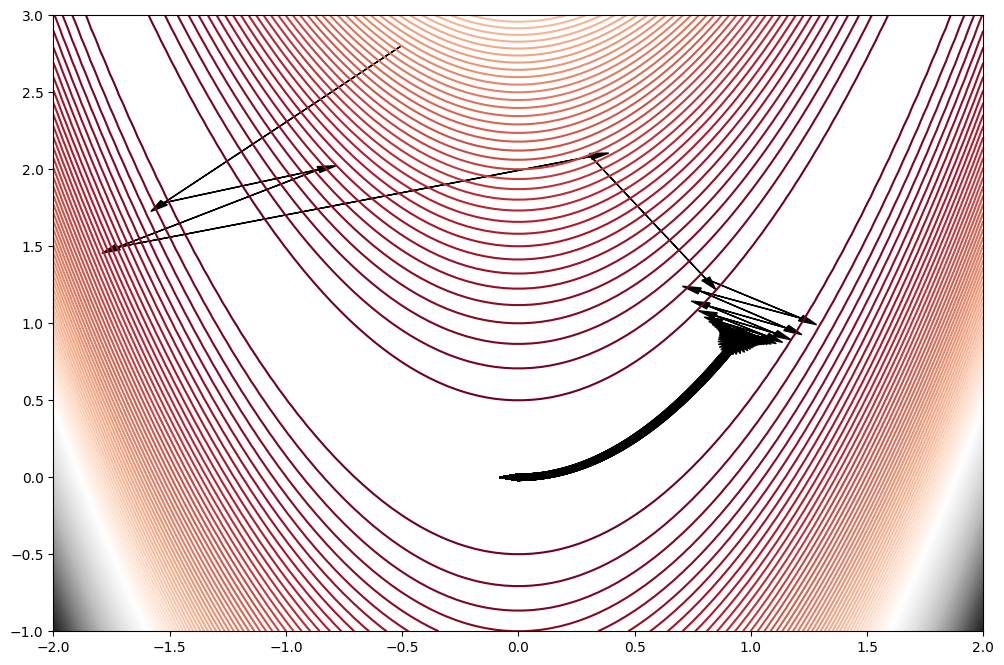

In [5]:
x = np.linspace(-2, 2, 100)
y = np.linspace(-1,3, 100)
X, Y = np.meshgrid(x, y)
plt.figure(figsize=(12, 8))
Z = rosenbrock(X, Y)
plt.contour(X, Y, Z, 100, cmap='RdGy')
np.random.seed(42)
p = np.array([np.random.uniform(-2, 2), np.random.uniform(-1, 3)])
step_size = 0.002
for i in range(10000):
    p1 = p - step_size * gradient(p[0], p[1])
    plt.arrow(p[0], p[1], p1[0]-p[0], p1[1]-p[1],head_width=0.04, head_length=0.08,fc='k', ec='k')
    if(p1 == p).all():
        break
    p = p1
print(p)
plt.show()
    

##### Gradient descent with Polyak’s momentum

[-1.07122683e-115  4.69815810e-230]


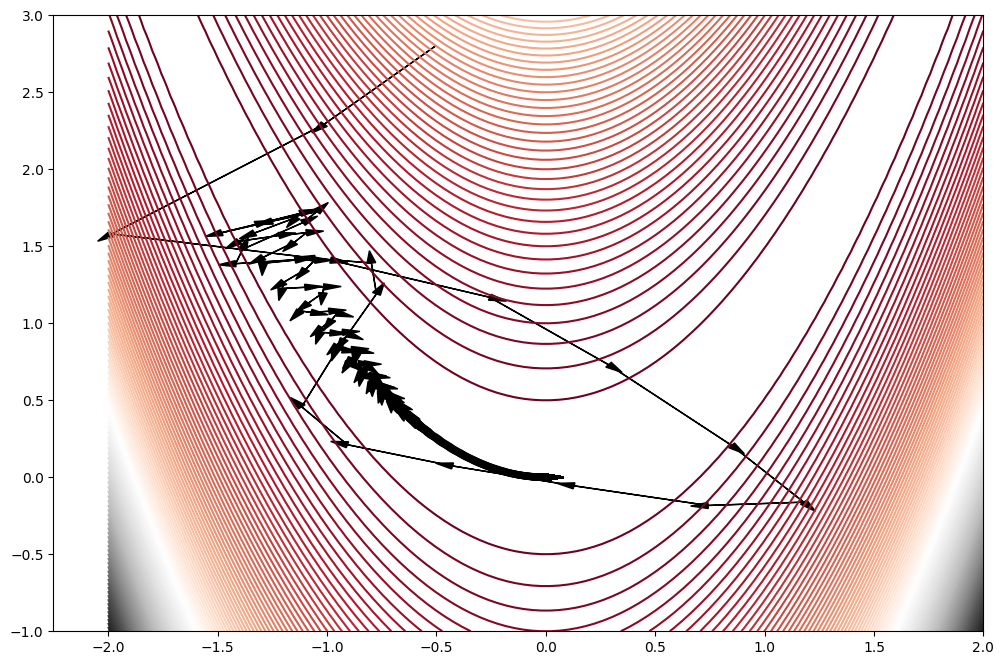

In [6]:
momentum = 0.9
v = np.array([0,0])
plt.figure(figsize=(12, 8))
plt.contour(X, Y, Z, 100, cmap='RdGy')
np.random.seed(42)
p = np.array([np.random.uniform(-2, 2), np.random.uniform(-1, 3)])
step_size = 0.001
for i in range(10000):
    v = momentum*v - step_size * gradient(p[0], p[1])
    p1 = p + v
    plt.arrow(p[0], p[1], p1[0]-p[0], p1[1]-p[1],head_width=0.04, head_length=0.08,fc='k', ec='k')
    if np.linalg.norm(gradient(p[0], p[1])) == 0:
        break
    p = p1
print(p)
plt.show()

##### Nesterov accelerated gradient descent

[9.36272106e-113 8.89992794e-225]


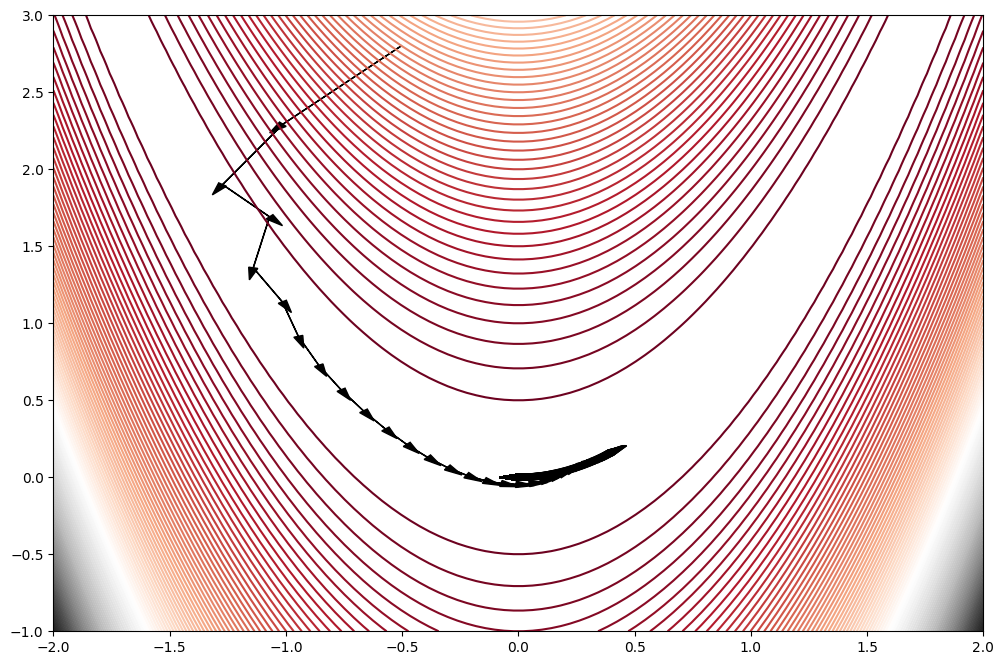

In [7]:
momentum = 0.9
v = np.array([0,0])
plt.figure(figsize=(12, 8))
plt.contour(X, Y, Z, 100, cmap='RdGy')
np.random.seed(42)
p = np.array([np.random.uniform(-2, 2), np.random.uniform(-1, 3)])
step_size = 0.001
for i in range(10000):
    g = gradient(p[0]+momentum*v[0], p[1]+momentum*v[1])
    v = momentum*v - step_size * g
    p1 = p + v
    plt.arrow(p[0], p[1], p1[0]-p[0], p1[1]-p[1],head_width=0.04, head_length=0.08,fc='k', ec='k')
    if np.linalg.norm(gradient(p[0], p[1])) == 0:
        break
    p = p1
print(p)
plt.show()

##### Adam optimizer

[8.55379078e-152 1.74856313e-025]


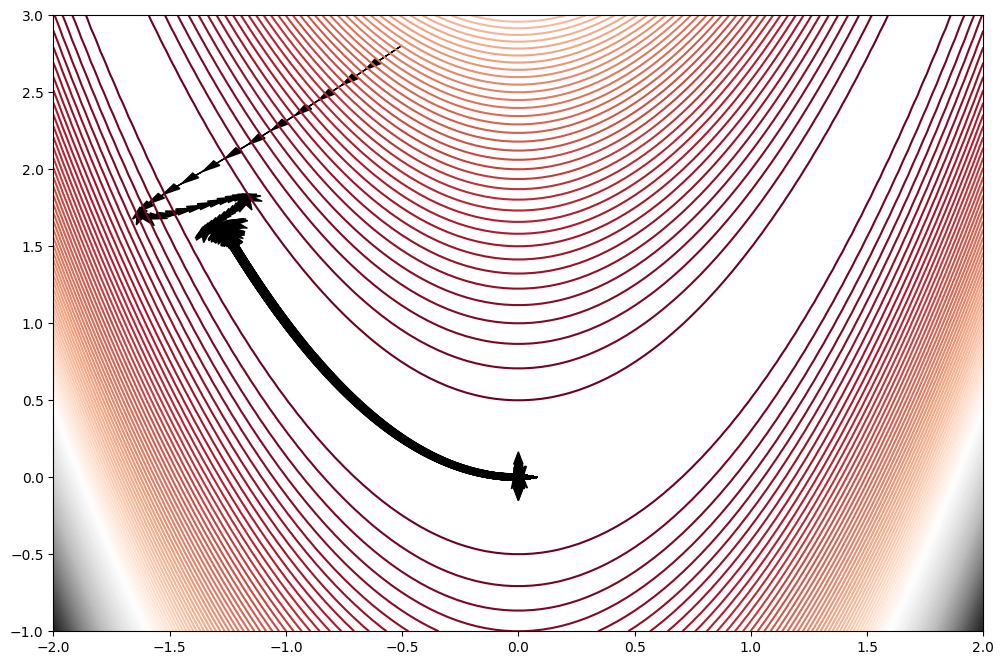

In [31]:
b1 = 0.9
b2 = 0.999
v = np.array([0,0])
m = np.array([0,0])
plt.figure(figsize=(12, 8))
plt.contour(X, Y, Z, 100, cmap='RdGy')
np.random.seed(42)
p = np.array([np.random.uniform(-2, 2), np.random.uniform(-1, 3)])
step_size = 0.1
i = 1
for i in range(1,10000):
    m = b1*m + (1-b1)*gradient(p[0], p[1])
    v = b2*v + (1-b2)*gradient(p[0], p[1])**2
    m_hat = m/(1-(b1)**i)
    v_hat = v/(1-(b2)**i)
    i=i+1
    p1 = p - step_size * m_hat/(np.sqrt(v_hat)+1e-8)
    plt.arrow(p[0], p[1], p1[0]-p[0], p1[1]-p[1],head_width=0.04, head_length=0.08,fc='k', ec='k')
    p = p1
print(p)
plt.show()

#### Gradient Descent and Variants - 2

In [6]:
def function(x, y):
    return (50/9)*(x**2+y**2)**3 - (209/18)*(x**2 + y**2)**2 + (59/9)*(x**2 + y**2)

In [7]:
def gradient_function(x,y):
    return np.array([np.float128(100/3*x*(x**2+y**2)**2 - 418/9*x*(x**2+y**2)+118/9*x), np.float128(100/3*y*(x**2+y**2)**2 - 418/9*y*(x**2+y**2)+118/9*y)])

##### Gradient descent with constant step size

[0. 0.]


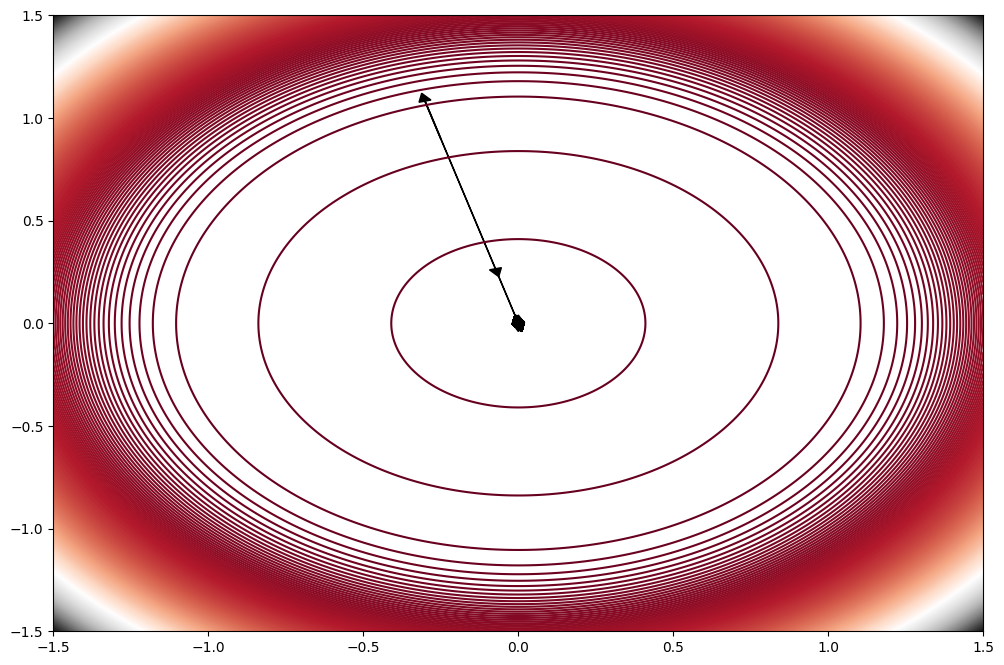

In [8]:
x = np.linspace(-1.5, 1.5, 1000)
y = np.linspace(-1.5,1.5, 1000)
X, Y = np.meshgrid(x, y)
plt.figure(figsize=(12, 8))
Z = function(X, Y)
plt.contour(X, Y, Z, 500, cmap='RdGy')
np.random.seed(42)
p = np.array([np.random.uniform(-1, 1), np.random.uniform(-1, 1)])
step_size = 0.1
for i in range(10000):
    p1 = p - step_size * gradient_function(p[0], p[1])
    plt.arrow(p[0], p[1], p1[0]-p[0], p1[1]-p[1],head_width=0.04, head_length=0.04,fc='k', ec='k')
    if(p1 == p).all():
        break
    p = p1
print(p)
plt.show()

##### Gradient descent with Polyak’s momentum

[-4.45174728e-486  1.59928909e-485]


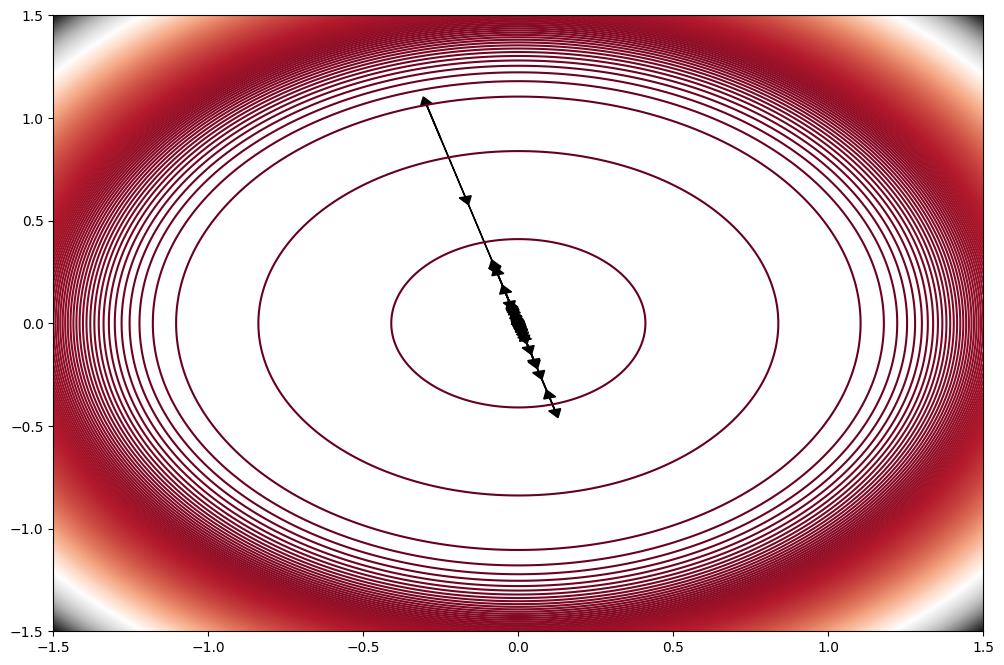

In [36]:
momentum = 0.8
v = np.array([0,0])
plt.figure(figsize=(12, 8))
plt.contour(X, Y, Z, 500, cmap='RdGy')
np.random.seed(42)
p = np.array([np.random.uniform(-1, 1), np.random.uniform(-1, 1)])
step_size = 0.09
for i in range(10000):
    v = momentum*v - step_size * gradient_function(p[0], p[1])
    p1 = p + v
    plt.arrow(p[0], p[1], p1[0]-p[0], p1[1]-p[1],head_width=0.04, head_length=0.04,fc='k', ec='k')
    if np.linalg.norm(gradient_function(p[0], p[1])) == 0:
        break
    p = p1
print(p)
plt.show()

##### Nesterov accelerated gradient descent

[-8.28299907e-2478  2.97566533e-2477]


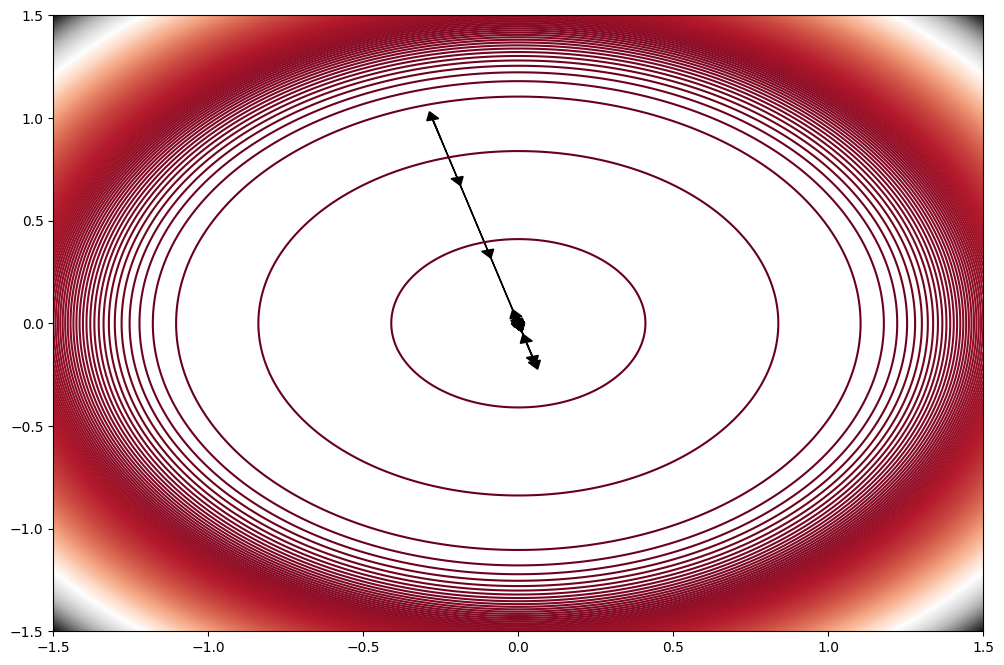

In [36]:
momentum = 0.9
v = np.array([0,0])
plt.figure(figsize=(12, 8))
plt.contour(X, Y, Z, 500, cmap='RdGy')
np.random.seed(42)
p = np.array([np.random.uniform(-1, 1), np.random.uniform(-1, 1)])
step_size = 0.05
for i in range(10000):
    g = gradient_function(p[0]+momentum*v[0], p[1]+momentum*v[1])
    v = momentum*v - step_size * g
    p1 = p + v
    plt.arrow(p[0], p[1], p1[0]-p[0], p1[1]-p[1],head_width=0.04, head_length=0.04,fc='k', ec='k')
    if np.linalg.norm(gradient_function(p[0], p[1])) == 0:
        break
    p = p1
print(p)
plt.show()

##### Adam optimizer

[1.01569365e-43 1.58737923e-44]


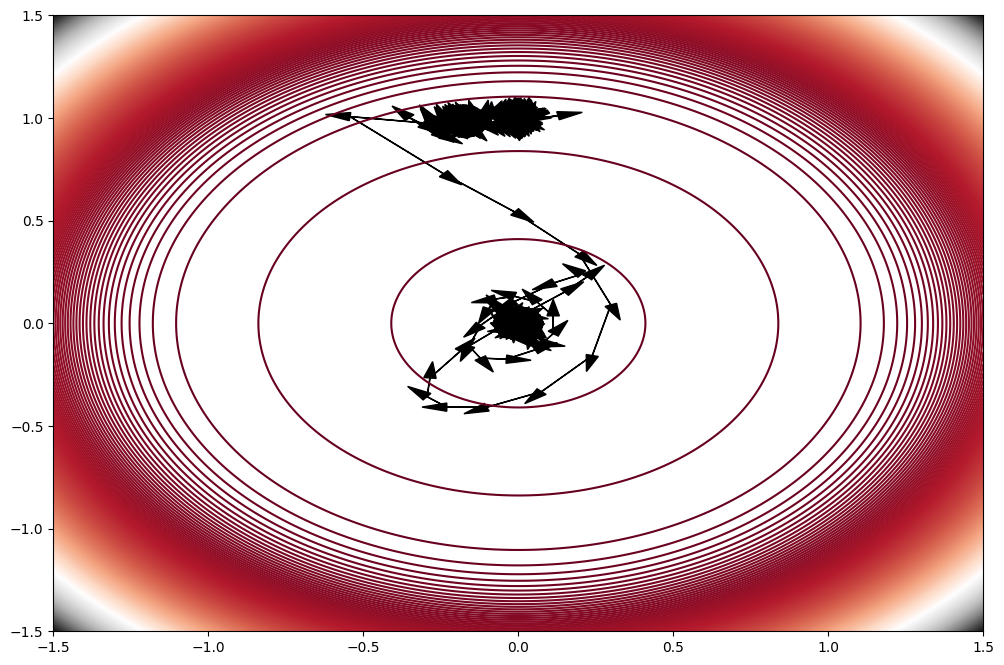

In [39]:
b1 = 0.9
b2 = 0.999
v = np.array([0,0])
m = np.array([0,0])
plt.figure(figsize=(12, 8))
plt.contour(X, Y, Z, 500, cmap='RdGy')
np.random.seed(42)
p = np.array([np.random.uniform(-1, 1), np.random.uniform(-1, 1)])
step_size = 0.1
i = 1
for i in range(1,10000):
    m = b1*m + (1-b1)*gradient_function(p[0], p[1])
    v = b2*v + (1-b2)*gradient_function(p[0], p[1])**2
    m_hat = m/(1-(b1)**i)
    v_hat = v/(1-(b2)**i)
    i=i+1
    p1 = p - step_size * m_hat/(np.sqrt(v_hat)+1e-8)
    plt.arrow(p[0], p[1], p1[0]-p[0], p1[1]-p[1],head_width=0.04, head_length=0.08,fc='k', ec='k')
    p = p1
print(p)
plt.show()